# AO3 Top 100 Works by Kudos - Exploratory Data Analysis

Note: This data was collected personally from Archive of Our Own in November 3, 2022 using a webscraper and has been cleaned for ease of analysis. It is possible for the top 100 works on the website to differ today from what it was then.

In [45]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

While the initial csv, top_100_kudos_clean contains all the necessary data for this project, the boolean dataframes were created to make it easier to analyze the data in many of the columns, which is in the format of a list. Work_id is the primary key connecting these dataframes.

In [46]:
# Import Data
top_100_kudos = pd.read_csv('top_100_kudos_clean.csv')
characters_bool = pd.read_csv('top_100_kudos_characters_bool.csv')
fandoms_bool = pd.read_csv('top_100_kudos_fandoms_bool.csv')
freeforms_bool = pd.read_csv('top_100_kudos_freeforms_bool.csv')
relationships_bool = pd.read_csv('top_100_kudos_relationships_bool.csv')
slash_categories_bool = pd.read_csv('top_100_kudos_slash_categories_bool.csv')
warnings_bool = pd.read_csv('top_100_kudos_warnings_bool.csv')

### Initial Exploration
The following code helps to familiarize oneself with the data. 

In [47]:
# Viewing the Index and Columns of the main dataframe
print(top_100_kudos.index)
print(top_100_kudos.columns)


RangeIndex(start=0, stop=100, step=1)
Index(['Unnamed: 0', 'work_id', 'user_id', 'title', 'username', 'fandoms',
       'rating', 'warnings', 'slash_categories', 'status', 'date_updated',
       'relationships', 'characters', 'freeforms', 'summary', 'language',
       'words', 'chapters', 'comments', 'kudos', 'bookmarks', 'hits',
       'completed', 'chapters_written', 'chapters_total'],
      dtype='object')


In [48]:
# Viewing the Index and Columns of the boolean tables
print('characters_bool')
print(characters_bool.index)
print(characters_bool.columns)

print('fandoms_bool')
print(fandoms_bool.index)
print(fandoms_bool.columns)

print('freeforms_bool')
print(freeforms_bool.index)
print(freeforms_bool.columns)

print('relationships_bool')
print(relationships_bool.index)
print(relationships_bool.columns)

print('slash_categories_bool')
print(slash_categories_bool.index)
print(slash_categories_bool.columns)

print('warnings_bool')
print(warnings_bool.index)
print(warnings_bool.columns)


characters_bool
RangeIndex(start=0, stop=100, step=1)
Index(['Unnamed: 0', 'Groot (Marvel)', 'Remus Lupin', 'Sirius Black',
       'James Potter', 'Lily Evans Potter', 'Peter Pettigrew', 'Severus Snape',
       'Minerva McGonagall', 'Bellatrix Black Lestrange',
       ...
       'Iwaizumi Hajime', 'Oikawa Tooru', 'Sawamura Daichi', 'Sugawara Koushi',
       'Kindaichi Yuutarou', 'Azumane Asahi', 'Nishinoya Yuu', 'Kunimi Akira',
       'Irihata Nobuteru', 'Baron Zemo'],
      dtype='object', length=395)
fandoms_bool
RangeIndex(start=0, stop=100, step=1)
Index(['Unnamed: 0', 'Guardians of the Galaxy - All Media Types', 'Marvel',
       'Marvel (Movies)', 'Marvel (Comics)',
       'Guardians of the Galaxy (Comics)', 'Harry Potter - J. K. Rowling',
       'Dream SMP', '僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia',
       'Haikyuu!!', 'Star Wars - All Media Types',
       'Star Wars Episode VII: The Force Awakens (2015)',
       'Minecraft (Video Game)', 'Video Blogging RPF', 'Te

It seems that the work_id is not the index. To fix that, I will reset the index of all the dataframes. This will keep a consistent primary key across all the dataframes, easing the work.

In [49]:
# Making sure the 'Unnamed: 0' column in the boolean dataframes is indeed the work_id
# print(characters_bool['Unnamed: 0'].head())
# print(fandoms_bool['Unnamed: 0'].head())
# print(freeforms_bool['Unnamed: 0'].head())
# print(relationships_bool['Unnamed: 0'].head())
# print(slash_categories_bool['Unnamed: 0'].head())
# print(warnings_bool['Unnamed: 0'].head())

# Reseting the indices.
top_100_kudos.set_index('work_id', inplace=True)
characters_bool.set_index('Unnamed: 0', inplace=True)
fandoms_bool.set_index('Unnamed: 0', inplace=True)
freeforms_bool.set_index('Unnamed: 0', inplace=True)
relationships_bool.set_index('Unnamed: 0', inplace=True)
slash_categories_bool.set_index('Unnamed: 0', inplace=True)
warnings_bool.set_index('Unnamed: 0', inplace=True)


Let's take a look at some of the statistics associated with the data!

In [54]:
# The old index column doubles as a rank on the basis of kudos so it gets renamed
top_100_kudos = top_100_kudos.rename(columns={'Unnamed: 0': 'rank'})

# The numerical data
print(top_100_kudos.describe())

             rank          words      comments          kudos     bookmarks  \
count  100.000000     100.000000    100.000000     100.000000    100.000000   
mean    49.500000  109820.640000   5029.820000   37008.180000   8147.160000   
std     29.011492  117619.939227   5649.419417   16226.197257   3460.596062   
min      0.000000      12.000000    232.000000   27173.000000   2082.000000   
25%     24.750000   12778.500000    937.500000   28841.750000   5640.500000   
50%     49.500000   74024.000000   3156.000000   31329.500000   8035.500000   
75%     74.250000  176300.750000   7059.000000   38771.000000   9679.250000   
max     99.000000  526969.000000  26966.000000  127483.000000  24991.000000   

               hits  chapters_written  chapters_total  
count  1.000000e+02        100.000000       90.000000  
mean   8.475519e+05         20.580000       19.555556  
std    9.350462e+05         28.956666       30.169972  
min    1.810710e+05          1.000000        1.000000  
25%    3

In [61]:
# The categorical data
print(characters_bool.sum().sort_values(ascending=False).head(10))
print(fandoms_bool.sum().sort_values(ascending=False).head(10))
print(freeforms_bool.sum().sort_values(ascending=False).head(10))
print(relationships_bool.sum().sort_values(ascending=False).head(10))
print(slash_categories_bool.sum().sort_values(ascending=False).head(10))
print(warnings_bool.sum().sort_values(ascending=False).head(10))

Draco Malfoy                  22
Harry Potter                  20
Hermione Granger              17
Ron Weasley                   14
Midoriya Izuku                13
Derek Hale                    12
Stiles Stilinski              12
Todoroki Shouto               12
Bakugou Katsuki               11
Aizawa Shouta | Eraserhead    10
dtype: int64
Harry Potter - J. K. Rowling                              28
僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia    15
Teen Wolf (TV)                                            12
방탄소년단 | Bangtan Boys | BTS                                 6
Dream SMP                                                  6
Marvel Cinematic Universe                                  5
Captain America (Movies)                                   4
Spider-Man - All Media Types                               4
Minecraft (Video Game)                                     4
Haikyuu!!                                                  3
dtype: int64
Hurt/Comfort                      

There is large diversity to the data. If I wanted to look more specifically into a fandom or character, there would be few data points. For more specific research I would need to rescrape data from the website, filtered by that fandom, character, etc.. 

As the data is now, it is better suited for broader analysis. In the future, I may wish to scrape the top 1000 fanfics.

### Visualizing Spread, Trends, and Patterns

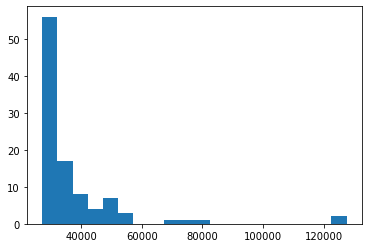

<Figure size 432x288 with 0 Axes>

In [64]:
# Let's take a look at the spread of the kudos
plt.hist(top_100_kudos['kudos'], bins=20)
plt.show()
plt.clf()

It appears that only a few fanfics have cracked the 100,000 kudos mark. A few more are over 60k, but the vast majority are under this mark, and the lower the number of kudos, the higher the count of fanfictions. I would expect this data to be increasingly right skewed the more data I collected, given that the intitial data was sorted by kudos, descending.

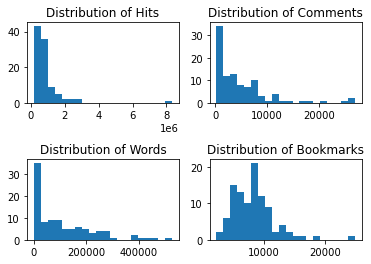

<Figure size 432x288 with 0 Axes>

In [70]:
# Let's see if the data continues its trend for hits, comments, words, and bookmarks.
plt.subplot(2, 2, 1)
plt.hist(top_100_kudos['hits'], bins=20)
plt.title('Distribution of Hits')
plt.subplot(2, 2, 2)
plt.hist(top_100_kudos['comments'], bins=20)
plt.title('Distribution of Comments')
plt.subplot(2, 2, 3)
plt.hist(top_100_kudos['words'], bins=20)
plt.title('Distribution of Words')
plt.subplot(2, 2, 4)
plt.hist(top_100_kudos['bookmarks'], bins=20)
plt.title('Distribution of Bookmarks')
plt.subplots_adjust(hspace=0.7)
plt.show()
plt.clf()

All of the data is right-skewed. It seems like there is one work that has an extremely high number of hits. It'll be curious to see if the same works have the highest counts for each type of data, or if there is some other pattern to the data and the outliers.

In [80]:
# Getting the title of the outlier by hits.
print(top_100_kudos[top_100_kudos['hits']>4000000].title)

# And the outlier by bookmarks
print(top_100_kudos[top_100_kudos['bookmarks']>20000].title)

work_id
work_10057010    All the Young Dudes
Name: title, dtype: object
work_id
work_10057010    All the Young Dudes
Name: title, dtype: object


It's the same fic! Let's see if there is a correlation between number of hits and number of bookmarks. A scatterplot is a great tool for this.